<a href="https://colab.research.google.com/github/edso2103/Cuadernos/blob/main/Taller_C1_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png"
width="250" height="250">
</img>
<br>
<i><b>Docente:</b> Darwin Martinez.</i>
<br>
<i><b>Asignatura:</b> Optimización como aprendizaje</i>
<br>
<i><b>Estudiantes:</b> Edna Sofía Orjuela, Gabriela Galindo y Sebastián Ariza</i>
<br>
<i><b>Grupo:</b> Celestia</i>
<br>
<i><b>Tema:</b> Regresión lineal y múltiple</i>
<br>
<i>19/08/22</i>
<br>
<img src="https://static.wikia.nocookie.net/doblaje/images/c/cc/Princess_celestia.png/revision/latest?cb=20171001023901&path-prefix=es"
width="250" height="250">
</FONT>
</p>

<br><br><FONT FACE="times new roman" SIZE=4>
<br> 
<i><b>Resumen:</b>*El principal problema consiste en el desconocimiento acerca del funcionamiento y uso de varias bibliotecas como sklearn, razón por la que se desea aplicar varias funciones estadísticas que se encuentran detrás de los modelos de la regresión lineal.*
*A continuación se utilizan los conocimientos establecidos acerca de como realizar una regresión y los diferentes modulos de graficación, de manera que se espera la apropiación del conocimiento en relación a las matemáticas y procesos que abarcan los modelos de regresión lineal y así mismo, reforzar los conocimientos de programación en python.* 
<br> 


<FONT FACE="times new roman" SIZE=5> **Regresion lineal simple**

<FONT FACE="times new roman" SIZE=4> **Paso 1.** *Se importan las correspondientes bibliotecas*

In [ ]:
#Leer el dataset
import pandas as pd     
#almacenar variables numéricas(arreglos)
import numpy as np            
#graficar
import matplotlib.pyplot as plt   
#mapa de calor          
import seaborn as sns  
#gráfica en 3D                                                    
from mpl_toolkits.mplot3d import axes3d  
import math       

<FONT FACE="times new roman" SIZE=4> **Paso 2.** *Se asigna el dataSet sobre peticiones, quejas, reclamos por tipo de productor en la ciudad de Bogotá, a la variable url y se muestran los primeros datos*

In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/sigab_pqrsxasextipoproductor.csv'

In [ ]:
PQRS = pd.read_csv(url, encoding='latin-1')
PQRS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 1 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   PERIODO|CONCESIONARIO|TIPOPRODUCTOR|CANTIDAD  973 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [ ]:
PQRS.head()

,PERIODO|CONCESIONARIO|TIPOPRODUCTOR|CANTIDAD
0,1802|AREA LIMPIA|Gran Productor|26
1,1802|AREA LIMPIA|Multiusuario No Residencial|6
2,1802|AREA LIMPIA|Multiusuario Residencial|212
3,1802|AREA LIMPIA|Pequeño Productor|131
4,1802|AREA LIMPIA|Residencial|532


<FONT FACE="times new roman" SIZE=4> **Paso 3.** *Se organiza el dataset, separando las columnas, convirtiendo los objetos en datos de tipo float y reseteando el indice, con el fin de lograr una mejor manipulación de los datos*

In [ ]:
PQRS = PQRS['PERIODO|CONCESIONARIO|TIPOPRODUCTOR|CANTIDAD'].str.split('|',expand=True)
PQRS.columns = ['PERIODO', 'CONCESIONARIO', 'TIPOPRODUCTOR','CANTIDAD']
PQRS['PERIODO'] = PQRS['PERIODO'].astype(float)
PQRS['CANTIDAD'] = PQRS['CANTIDAD'].astype(float)
PQRS = PQRS.reset_index(drop=True) 
PQRS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PERIODO        973 non-null    float64
 1   CONCESIONARIO  973 non-null    object 
 2   TIPOPRODUCTOR  973 non-null    object 
 3   CANTIDAD       973 non-null    float64
dtypes: float64(2), object(2)
memory usage: 30.5+ KB


In [ ]:
tipos = list(set(PQRS['TIPOPRODUCTOR']))

In [ ]:
#Se convierte la columna de TIPOPRODUCTOR en valores numéricos
PQRS['TIPOPRODUCTOR'] = PQRS['TIPOPRODUCTOR'].astype('category').cat.codes/len(tipos)

<FONT FACE="times new roman" SIZE=4> **Paso 4.** *Se visualiza la relación entre las variables para establecer cuales usar para probar las regresiones*

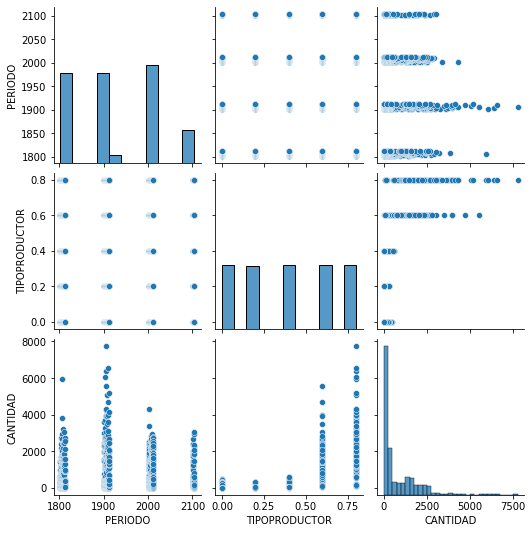

In [ ]:
sns.pairplot(PQRS)

<FONT FACE="times new roman" SIZE=4> **Paso 5.** *Se halla la correlación del dataset y se elabora un mapa de calor para mostrar de mejor forma la correlación significativa entre las dos variables*

In [ ]:
correlacion = PQRS.corr()
correlacion

,PERIODO,TIPOPRODUCTOR,CANTIDAD
PERIODO,1.000000,0.000358,-0.002696
TIPOPRODUCTOR,0.000358,1.000000,0.724003
CANTIDAD,-0.002696,0.724003,1.000000


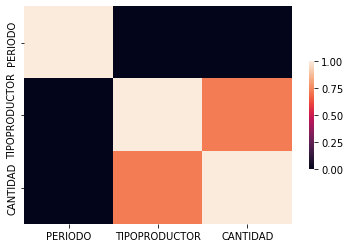

In [ ]:
sns.heatmap(correlacion,cbar_kws={'shrink':0.5})

<FONT FACE="times new roman" SIZE=4> **Paso 6.** *Se ajusta el dataset con únicamente la columnas de 'TIPOPRODUCTOR' y 'CANTIDAD' y se muestran los primeros datos*

In [ ]:
PQRS = PQRS[['TIPOPRODUCTOR', 'CANTIDAD']]
PQRS.head()

,TIPOPRODUCTOR,CANTIDAD
0,0.0,26.0
1,0.2,6.0
2,0.4,212.0
3,0.6,131.0
4,0.8,532.0


In [ ]:
PQRS.shape

(973, 2)

<FONT FACE="times new roman" SIZE=4> **Paso 7.** *Se crean dos arreglos x y y con los datos de las columnas 'TIPOPRODUCTOR' y 'CANTIDAD' respectivamente*

In [ ]:
x = np.array(PQRS[['TIPOPRODUCTOR']])
y = np.array(PQRS[['CANTIDAD']])

<FONT FACE="times new roman" SIZE=4> **Paso 8.** *Se mide el rendimiento del modelo por medio del train y test con sus respectivas gráficas*

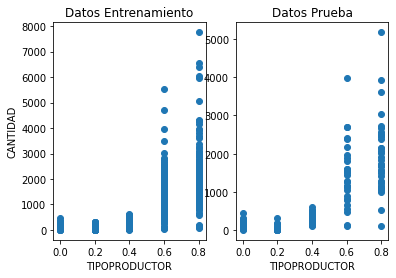

In [ ]:
#Se divide el conjunto de datos de entrenamiento (80%) y de prueba(20%)
msk = np.random.rand(len(PQRS)) < 0.8
train = PQRS[msk]
train_x = train[['TIPOPRODUCTOR']]
train_y = train[['CANTIDAD']]
test = PQRS[~msk]
test_x = test[['TIPOPRODUCTOR']]
test_y = test[['CANTIDAD']]


plt.subplot(1, 2, 1)
plt.title('Datos Entrenamiento')
plt.scatter(train_x, train_y)
plt.xlabel('TIPOPRODUCTOR')
plt.ylabel('CANTIDAD')
plt.subplot(1,2,2)
plt.title('Datos Prueba')
plt.scatter(test_x, test_y)
plt.xlabel('TIPOPRODUCTOR')


plt.show()

In [ ]:
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)
print(train_x.shape)
print(train_y.shape)

(798, 1)
(798, 1)


<FONT FACE="times new roman" SIZE=4> **Paso 9.** *Se crean funciones para hallar:*

*   *La pendiente*
*   *El punto de intersección*
*   *El error cuadrático*
*   *El coeficiente de correlación*
*   *El ruido Gaussiano de la pendiente*
*   *El ruido Gaussiano del punto de intersección*
*   *La predicción* 

In [ ]:
#Calcula la pendiente de la recta (m)
def pendiente(x, y):

    n = y.shape[0] #tamaño
    x_sum = sum(x)
    y_sum = sum(y)
    x_por_y = sum(x*y)
    X_2 = sum(x*x)   
    num = (n*x_por_y)-(x_sum*y_sum)
    den = (n*X_2)-(x_sum*x_sum)
    return num/den
  
#Calcula el punto de intersección (b)
def punto_interseccion(x, y):

    n = y.shape[0] #tamaño
    x_sum = sum(x)
    y_sum = sum(y)
    x_por_y = sum(x*y)
    X_2 = sum(x*x)   
    num = (y_sum*X_2)-(x_sum*x_por_y)
    den = (n*X_2)-(x_sum*x_sum)
    
    return num/den

m = pendiente(x, y)
b = punto_interseccion(x, y)

#Error cuadrático medio entre el dato original y el dato del modelo 
def calcular_error(y, y_):

    n = y.shape[0] 
    error = np.sum((y-y_)**2)/n
    return error

#Calcula el coeficiente de correlación manualmente
def coeficiente_correlacion(x, y):

    n = y.shape[0] 
    x_sum = sum(x)
    y_sum = sum(y)
    x_por_y = sum(x*y)
    X_2 = sum(x*x)
    Y_2 = sum(y*y)    
    num = (y_sum*X_2)-(x_sum*x_por_y)
    den = (n*X_2)-(x_sum*x_sum)
    num = (n*x_por_y)-(x_sum*y_sum)
    den = (math.sqrt((n*X_2)-(x_sum*x_sum)))*(math.sqrt((n*Y_2)-(y_sum*y_sum)))
    return num/den


def ruido_gaussiano_m(x, y):

    B_2 = sum((b+(m*x)-y)*(b+(m*x)-y))
    n = y.shape[0] 
    x_sum = sum(x)
    X_2 = sum(x*x)  
    y_sum = sum(y)
    x_por_y = sum(x*y)
    num = (y_sum*X_2)-(x_sum*x_por_y)
    den = (n*X_2)-(x_sum*x_sum)
    frac_1 = (n)/((n*X_2)-(x_sum*x_sum))
    frac_2 = (B_2)/(n-2)
    return math.sqrt(frac_1*frac_2)

def ruido_gaussiano_b(x, y):

    B_2 = sum((b+(m*x)-y)*(b+(m*x)-y))
    n = y.shape[0] 
    x_sum = sum(x)
    y_sum = sum(y)
    x_por_y = sum(x*y)
    X_2 = sum(x*x)  
    num = (y_sum*X_2)-(x_sum*x_por_y)
    den = (n*X_2)-(x_sum*x_sum)
    frac_1 = (X_2)/((n*X_2)-(x_sum*x_sum))
    frac_2 = (B_2)/(n-2)
    return math.sqrt(frac_1*frac_2)

def prediccion(x):
    quejas = (m*x)+b
    return quejas

def la_precision(y, y_hat):

  #Variación explicada
  SCE = ((y_hat-np.mean(y))*(y_hat-np.mean(y))).sum()

  #Variación total
  SCT = ((y-np.mean(y))*(y-np.mean(y))).sum()

  #Coeficiente de determinación
  r_2 = SCE/SCT

  return r_2



<FONT FACE="times new roman" SIZE=4> **Paso 10.** *Se muestra información acerca de los datos obtenidos apartir de la aplicación de la funciones anteriores*

In [ ]:
print('PENDIENTE ', m)
print('PUNTO DE INTERSECCIÓN: ', b)
print('RECTA: ', m, 'x', '+', b)
print('COEFICIENTE DE CORRELACIÓN DATOS ENTRENAMIENTO: ',
       coeficiente_correlacion(train_x, train_y))
print('RUIDO GAUSSIANO(M): ', ruido_gaussiano_m(train_x,train_y))
print('RUIDO GAUSSIANO(B): ', ruido_gaussiano_b(train_x,train_y))
print('COEFICIENTE DE CORRELACIÓN DATOS PRUEBA: ',coeficiente_correlacion(test_x,test_y))
recta = str(m) + 'x +' + str(b)

PENDIENTE  [2612.42460958]
PUNTO DE INTERSECCIÓN:  [-254.78379023]
RECTA:  [2612.42460958] x + [-254.78379023]
COEFICIENTE DE CORRELACIÓN DATOS ENTRENAMIENTO:  [0.72114806]
RUIDO GAUSSIANO(M):  90.08505603939524
RUIDO GAUSSIANO(B):  44.32562504647694
COEFICIENTE DE CORRELACIÓN DATOS PRUEBA:  [0.74017444]


In [ ]:
len(test_x)

175

In [ ]:
y_hat_test = []
y_hat_train = []
for i in test_x:
  y_hat_test.append(prediccion(i))

for i in train_x:
  y_hat_train.append(prediccion(i))

In [ ]:
#precision con el conjunto de entrenamiento
la_precision(train_y, y_hat_train)

0.5071773562735211

In [ ]:
#precision con el conjunto de prueba
la_precision(test_y, y_hat_test)

0.6169748021569651

<FONT FACE="times new roman" SIZE=4> **Paso 11.** *Se realiza la gráfica de dispersión que establece la relación entre la variable x (tipo de productor) y y  (número de quejas)*

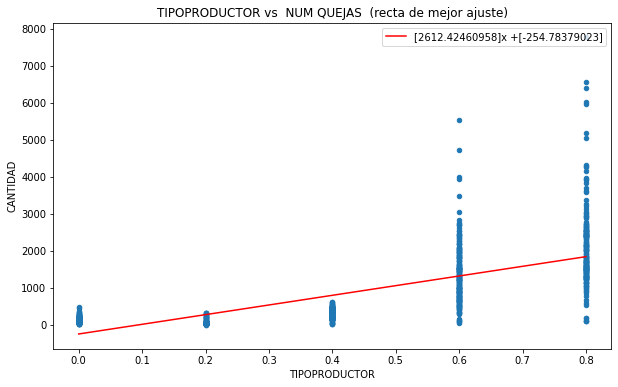

In [ ]:
PQRS.plot(kind='scatter', x='TIPOPRODUCTOR', y='CANTIDAD', figsize=(10, 6))
plt.title('TIPOPRODUCTOR vs  NUM QUEJAS  (recta de mejor ajuste)')
plt.plot(x, (m*x) + b, 'r', label=str(recta))
plt.legend(loc=1)
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 12.** *Se muestra un ejemplo con la pendiente, el punto de intersección y el respectivo error cuadrático*

In [ ]:
y_ = m*x + b
error = calcular_error(y, y_)

print('m:', m, 'b:', b)  
print('error:', error)

m: [2612.42460958] b: [-254.78379023]
error: 496118.1519907845


<FONT FACE="times new roman" SIZE=4> **Paso 13.** *Se halla el coeficiente de determinación que corresponde a r^2*

In [ ]:
print('El coeficiente de determinación de los' 
      +'datos de entrenamiento corresponde a: ',
      (coeficiente_correlacion(train_x,train_y))**2)
print('El coeficiente de determinación de los'
      +'datos de prueba corresponde a: ',
      (coeficiente_correlacion(test_x,test_y))**2)

El coeficiente de determinación de losdatos de entrenamiento corresponde a:  [0.52005452]
El coeficiente de determinación de losdatos de prueba corresponde a:  [0.54785821]


<FONT FACE="times new roman" SIZE=5> **Regresion lineal multiple**

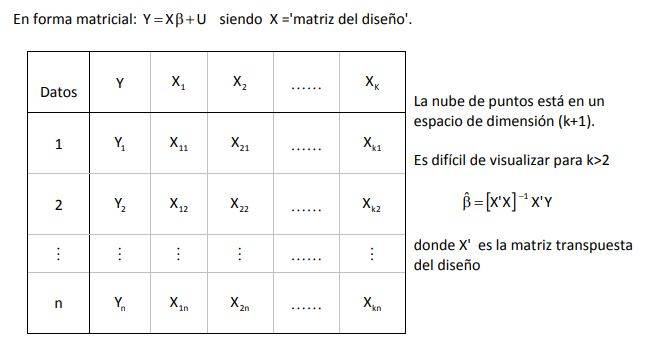

<FONT FACE="times new roman" SIZE=4> 
*Las técnicas de regresión lineal múltiple parten de (k+1) variables cuantitativas, siendo Y la variable de respuesta y (X ,X , , X ) 1 2 LL k las variables explicativas. Se trata de extender a las 'k' variables las técnicas de la regresión lineal simple. En esta línea, la variable Y se puede expresar mediante una función lineal de las variables (X ,X , , X )*

<FONT FACE="times new roman" SIZE=4> 
*Cada uno de los coeficientes βi representa el efecto de la variable independiente sobre la variable explicada. Es decir, el valor estimado i ˆ β indica la variación que experimenta la variable dependiente cuando la variable independiente Xi varía en una unidad y todas las demás permanecen constantes.* 

<FONT FACE="times new roman" SIZE=4> **Paso 1.** *Se asigna el dataSet a la variable url y se muestran los primeros datos.*<br> 
*Es importante aclarar que el dataset es de viviendas en condiciones de alto riesgo, en él se pueden encontrar variables como, la localidad,zona, predios, familias, personas, notificaciones, recomendados, etc.*

In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/export_surrenero_2022.csv'

In [ ]:
dataset_1 = pd.read_csv(url)
dataset_1.head()

,ANIO,MES,LOCALIDAD,ZONA,PREDIOS,FAMILIAS,PERSONAS,NOTIFICACIONES,RECOMENDADOS,SUR,VUR
0,1997,1,1.0,Migraci�n SIRE,3,NaN,NaN,NaN,NaN,NaN,NaN
1,1997,1,2.0,Migraci�n SIRE,9,NaN,NaN,NaN,NaN,NaN,NaN
2,1997,1,3.0,Migraci�n SIRE,37,NaN,NaN,NaN,NaN,NaN,NaN
3,1997,1,4.0,Migraci�n SIRE,357,NaN,NaN,NaN,NaN,NaN,NaN
4,1997,1,5.0,Migraci�n SIRE,67,NaN,NaN,NaN,NaN,NaN,NaN


<FONT FACE="times new roman" SIZE=4> **Paso 2.** *Se organiza el dataframe, separando las columnas, convirtiendo algunos datos a tipo entero, borrando algunas columnas y reseteando el indice*

In [ ]:
dataset_1 = dataset_1[['ANIO', 'MES', 'LOCALIDAD', 'PREDIOS', 'FAMILIAS', 'PERSONAS']]
dataset_1 = dataset_1.dropna(axis = 0)
dataset_1  = dataset_1[dataset_1['PREDIOS'] != " III"]
dataset_1['PREDIOS'] = dataset_1['PREDIOS'].astype(int)
dataset_1['FAMILIAS'] = dataset_1['FAMILIAS'].astype(int)
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 122 to 721
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANIO       119 non-null    int64  
 1   MES        119 non-null    int64  
 2   LOCALIDAD  119 non-null    float64
 3   PREDIOS    119 non-null    int64  
 4   FAMILIAS   119 non-null    int64  
 5   PERSONAS   119 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 6.5 KB


In [ ]:
dataset_1.head()

,ANIO,MES,LOCALIDAD,PREDIOS,FAMILIAS,PERSONAS
122,2012,11,19.0,524,506,2005.0
123,2012,12,19.0,8,8,7.0
136,2013,2,5.0,2,12,29.0
139,2013,2,19.0,200,247,705.0
143,2013,3,4.0,45,52,176.0


<FONT FACE="times new roman" SIZE=4> **Paso 3.** *Se realiza un mapa de calor con la correlación de las variables*

In [ ]:
corr = dataset_1.corr()
corr

,ANIO,MES,LOCALIDAD,PREDIOS,FAMILIAS,PERSONAS
ANIO,1.000000,0.065983,-0.050842,-0.372244,-0.382569,-0.384509
MES,0.065983,1.000000,-0.096876,-0.071543,-0.052699,-0.057215
LOCALIDAD,-0.050842,-0.096876,1.000000,0.080775,0.069951,0.096083
PREDIOS,-0.372244,-0.071543,0.080775,1.000000,0.945494,0.957744
FAMILIAS,-0.382569,-0.052699,0.069951,0.945494,1.000000,0.977603
PERSONAS,-0.384509,-0.057215,0.096083,0.957744,0.977603,1.000000


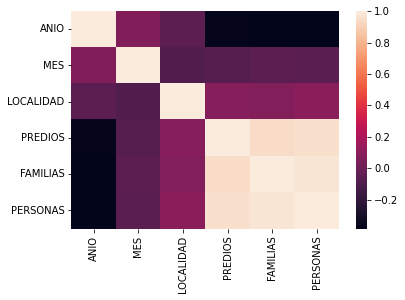

In [ ]:
sns.heatmap(corr, xticklabels = corr.columns.values,yticklabels = corr.columns.values )

<FONT FACE="times new roman" SIZE=4> **Paso 4.** *Se visualiza la relación entre las variables para establecer cuales usar para probar las regresiones*

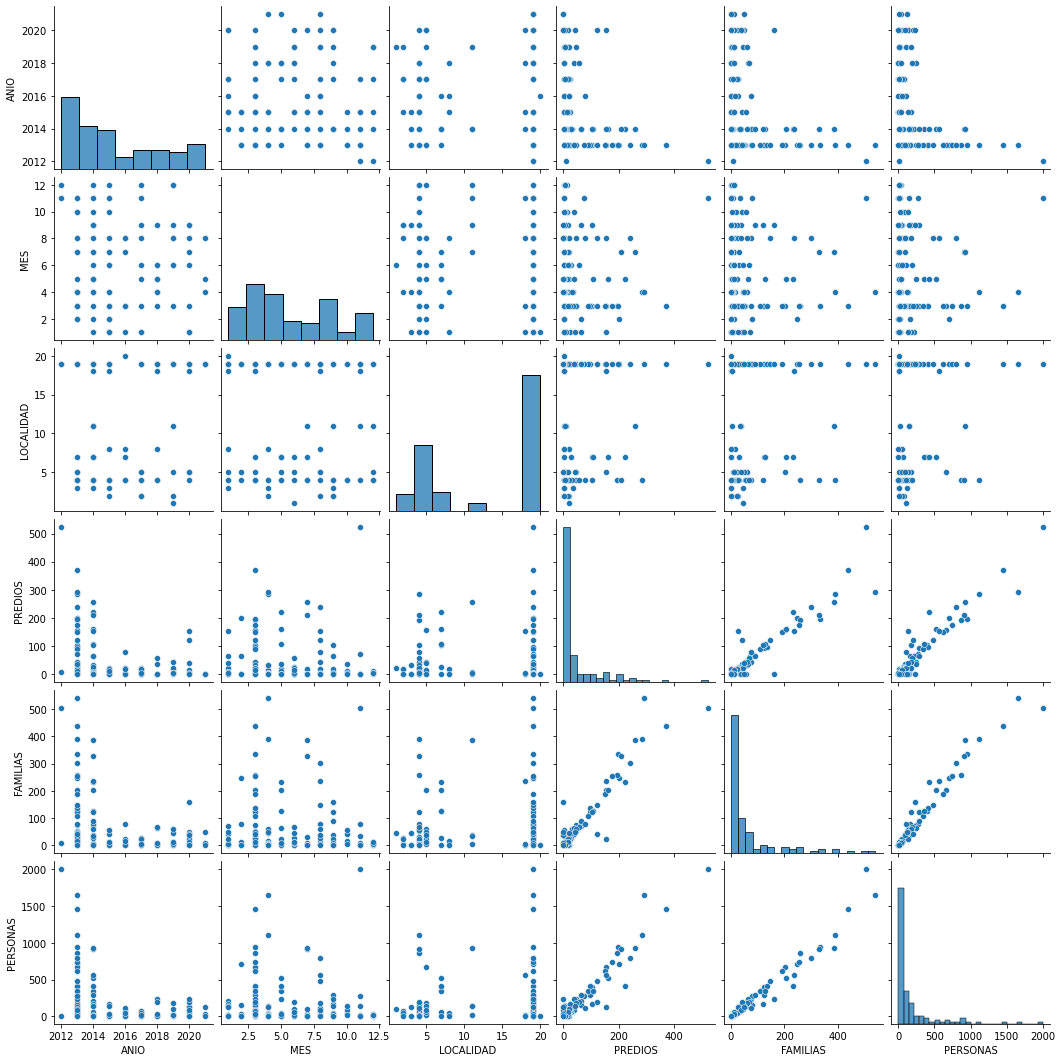

In [ ]:
sns.pairplot(dataset_1)

<FONT FACE="times new roman" SIZE=4> **Paso 5.** *Se guarda solo la información que se puede correlacionar (valores numéricos), para ello, se tuvo en cuenta las variables con mayor correlación*

In [ ]:
dataset_1 = dataset_1[['PREDIOS', 'FAMILIAS', 'PERSONAS', 'LOCALIDAD']]

msk = np.random.rand(len(dataset_1)) < 0.8
train = dataset_1[msk]
test = dataset_1[~msk]

print(train.shape)
print(test.shape)



(101, 4)
(18, 4)


<FONT FACE="times new roman" SIZE=4> **Paso 6.** *Se realiza una función que permita hallar la regresion multiple, entre las dos formas posibles regresión lineal múltiple matricial o ecuaciones normales minimo cuadraticas, se empleará la regresión multiple matricial los pasos se enlistan antes de cada línea de código, esta función devuelve un arreglo con los valores de B, B0(punto de corte) y Bi que es la pendiente asociada a cada variable i, adicionalmente devuelve y_hat que es un arreglo con los valores predichos por el modelo, dicha variable servirá para hallar la precisión del modelo*

In [ ]:
def regresion_multiple(*args, y):

  unos = np.ones(y.shape[0])
  #Agregar una fila de unos de la longitud
  #de los registros como lo establece la teoria

  x_T = np.array([unos])
  num_variables = len(args)
  #Formar una matriz con los valores de cada variables,
  #en cada una de las iteraciones se agrega una variable a
  # la matriz transpuesta

  for i in range(num_variables):
    x_T = np.append(x_T, np.array([args[i]]),axis =0)

  #La transpuesta de la transpuesta es la matriz original x
  x = x_T.T
  #Hallar la matriz inversa del producto matricial
  #entre la matriz transpuesta y la original

  inversa = np.linalg.inv(np.dot(x_T, x))
  #Producto matricial entre la matriz transpuesta y
  #la variable independiente

  trans_y = np.dot(x_T, y)
  #Producto entre la matriz inversa y trans_y para obtener los valores de B
  B = np.dot(inversa, trans_y)

  #Creamos una lista vacia para guardar los valores de predicción
  y_hat = []

  #Para valor x de las variables dependientes hallamos el
  # y con los valores de B obtenidos arriba
  #De 1 al total de registros 
  for i in range(y.shape[0]): 
    v = B[0]  #Punto de corte
    for j in range(1, num_variables+1):
      v += (B[j]*x[i][j]) #B[1] B[2] B[n]
    y_hat.append(v)  #Agregamos la predicción de cada registro a la lista
    
  y_hat = np.array(y_hat)
  return B, y_hat

<FONT FACE="times new roman" SIZE=4> **Paso 7.** *Se crea la función la_precision recibe la variable independiente y la variable y_hat que se obtiene al utilizar la función regresion_multiple, con esta dos variables halla la precisión del modelo con los mismo datos de entrenamiento*

In [ ]:
def la_precision(y, y_hat):

  #Variación explicada
  SCE = ((y_hat-np.mean(y))*(y_hat-np.mean(y))).sum()

  #Variación total
  SCT = ((y-np.mean(y))*(y-np.mean(y))).sum()

  #Coeficiente de determinación
  r_2 = SCE/SCT

  return r_2

<FONT FACE="times new roman" SIZE=4> **Paso 8.** *Se crea la función predecir recibe los valores de la regresión multiple obtenidos en dicha función (B) y los valores que quiere dar a cada variable para hacer la predicción, la función verifica que el numero de variables pasadas a la función sea consistente con el número de variables que recibe necesita el modelo, en caso de no cumplir la condición de variables devuelve -11111, si no devuelve la predicción*

In [ ]:
def predecir(B, *arg):

  if len(arg) == B.shape[0]-1:
      prediccion = B[0]
      for j in range(1, B.shape[0]):
        prediccion += (B[j]*arg[j-1]) 
  else:
    prediccion = -11111
  return round(prediccion,2)


<FONT FACE="times new roman" SIZE=4> **Paso 9.** *Se crea la función precision_prueba que recibe el arreglo B devuelto por la funcion de regresion_multiple, adicionalmente recibe los datos de prueba (x y y) con esto se hallará la precisión de modelo en datos de prueba y se probará que tan bien generaliza el modelo*

In [ ]:
def precision_prueba(B, *x_test, y_test):
  
  matrix_t = np.array([x_test[0]])
  num_variables = len(x_test)

  for i in range(1,num_variables):  
    matrix_t = np.append(matrix_t, np.array([x_test[i]]),axis =0)

  matrix = matrix_t.T
  y_hat = []
  
  for i in range(y_test.shape[0]): 
    v = B[0] 
    for j in range(1, num_variables+1): 
      v += (B[j]*matrix[i][j-1]) 
    y_hat.append(v)  
    
  y_hat = np.array(y_hat)
  return la_precision(y_test, y_hat)
  

<FONT FACE="times new roman" SIZE=5> **Ejercicios** 

<FONT FACE="times new roman" SIZE=4> **1.1.** *Se realiza la regresion multiple tomando como variable independiente 'PREDIOS' y como variables dependientes 'LOCALIDAD', 'FAMILIAS' y 'PERSONAS', se halla la formula del modelo, la precision y se realizan algunas predicciones*

In [ ]:
B, y_hat= regresion_multiple(train['LOCALIDAD'],
                            train['FAMILIAS'],
                            train['PERSONAS'],
                            y= train['PREDIOS'])
print('Punto de corte: %.2f'%B[0])
print('Pendiente variable 1: %.2f'%B[1])
print('Pendiente variable 2: %.2f'%B[2])
print('Pendiente variable 3: %.4f'%B[3])

Punto de corte: 2.71
Pendiente variable 1: 0.13
Pendiente variable 2: -0.01
Pendiente variable 3: 0.2414


<FONT FACE="times new roman" SIZE=4> **1.2.** *Precisión del modelo*

In [ ]:
print('La precisión del modelo con los datos de entrenamiento'
      +'es de: %.4f'%la_precision(train['PREDIOS'], y_hat))
print('La precisión del modelo en los datos de prueba es:'
      +' %.2f'%precision_prueba(B, test['LOCALIDAD'],
                            test['FAMILIAS'],
                            test['PERSONAS'],
                            y_test =test['PREDIOS']))

La precisión del modelo con los datos de entrenamientoes de: 0.9420
La precisión del modelo en los datos de prueba es: 0.20


<FONT FACE="times new roman" SIZE=4> **1.3.** *Regresión*

In [ ]:
print('La formula de la regresión es: %.2f'%B[0]
      +'+%.2f'%B[1] + '*X1'
      +'+%.2f'%B[2] + '*X2'
      +'+%.4f'%B[3] + '*X3')

La formula de la regresión es: 2.71+0.13*X1+-0.01*X2+0.2414*X3


<FONT FACE="times new roman" SIZE=4> **1.4.** *Se visualizan los primero diez valores predichos y las 10 primeras etiquetas reales para ver la similitud*

In [ ]:
print(y_hat[0:10])
print(train['PREDIOS'][0:10])

[486.40209739   6.77338917  10.28077866 173.974185    45.42303544
 210.38537389  27.90897753 162.78247459  98.75849418  74.45905843]
122    524
123      8
136      2
139    200
143     45
144    194
145     26
146    156
147    103
149     95
Name: PREDIOS, dtype: int64


<FONT FACE="times new roman" SIZE=4> **1.5.** *Predicciones*

In [ ]:
#este deberia dar 524
print(predecir(B, 19, 506, 2005))

486.4


In [ ]:
#este deberia dar 8
print(predecir(B, 19,8,7))

6.77


<FONT FACE="times new roman" SIZE=4> **2.** *A continuación se utilizan dos variables dependientes para predecir la cantidad de predios de alto riesgo de acuerdo a el número de familias y la cantidad de personas presentes en ellas*

<FONT FACE="times new roman" SIZE=4> **2.1.** *Se visualizan los datos*

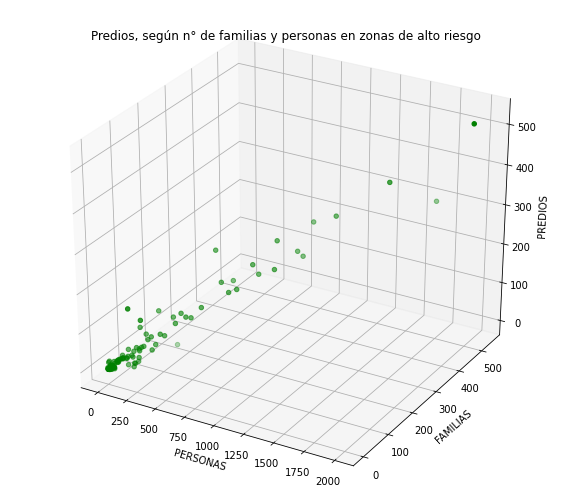

In [ ]:
# Creamos la figura
fig = plt.figure(figsize=(10, 9))
# Creamos el plano 3D
ax_1 = fig.add_subplot(111, projection='3d')

# Agregamos los puntos en el plano 3D
ax_1.scatter(dataset_1['PERSONAS'], 
            dataset_1['FAMILIAS'], dataset_1['PREDIOS'],
            c='g', marker='o')
plt.title('Predios, según n° de familias y personas en zonas de alto riesgo')

ax_1.set_xlabel('PERSONAS')
ax_1.set_ylabel('FAMILIAS')
ax_1.set_zlabel('PREDIOS')
# Mostramos el gráfico
plt.show()

<FONT FACE="times new roman" SIZE=4> **2.5.** *Recta*

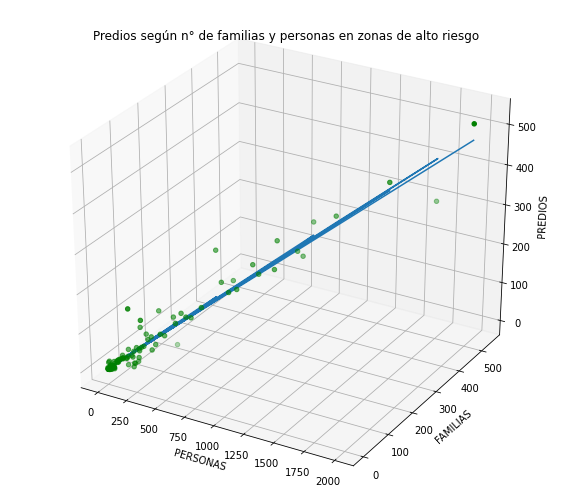

In [ ]:
fig = plt.figure(figsize=(10,9))

ax_1 = fig.add_subplot(111, projection='3d')


ax_1.scatter(dataset_1['PERSONAS'], 
            dataset_1['FAMILIAS'], dataset_1['PREDIOS'],
            c='g', marker='o')

plt.title('Predios según n° de familias y personas en zonas de alto riesgo')

ax_1.set_xlabel('PERSONAS')
ax_1.set_ylabel('FAMILIAS')
ax_1.set_zlabel('PREDIOS')

ax_1.plot3D(dataset_1['PERSONAS'], 
           dataset_1['FAMILIAS'],
           B[0] + (dataset_1['FAMILIAS']*B[2])
           + (dataset_1['PERSONAS']*B[3]))
plt.show()

<br><br><FONT FACE="times new roman" SIZE=4>
<br> 
<i><b>Conclusiones:</b>  
* El desarrollo de este trabajo es de utilidad para entender a profundidad los modelos de regresion lineal simple y regresión lineal múltiple, así como evidenciar en que casos es mas factible o beneficioso que otros modelos de regresión, en este ejercicio particular se concluye que: <br>
* Al realizar la funcion de regresion_multiple es mas factible usar la forma matricial que las ecuaciones normales mínimo cuadráticas, gracias a la facilidad con la que Python realiza operaciones entre matrices con el modulo numpy<br>
* En las aplicaciones de la regresión múltiple es posible notar que la precisión con los datos de prueba es mayor a la precisión de los datos de entrenamiento, la diferencia no es muy grande, ambas precisiones son considerablemente buenas. <br>
* La visualización de datos y el uso de herramientas estadísticas es de vital importancia previamente a la construcción del modelo
* La precisión de la regresión lineal múltiple fue mayor con respecto a la regresión lineal simple, debido a la correlación y el número de variables elegidas en cada uno de los datasets  </i>